In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read data from CSV file
data = pd.read_csv("/content/drive/MyDrive/Data Science/Fifa_world_cup_matches.csv")

# Drop unnecessary columns
data = data.drop(labels=['date', 'hour', 'category'], axis=1)
data.head()

# Convert 'possession' columns from object type to integer type
def deletePercent(x):
    return int(x.replace('%', ''))

data['possession team1'] = data['possession team1'].apply(deletePercent)
data['possession team2'] = data['possession team2'].apply(deletePercent)
data['possession in contest'] = data['possession in contest'].apply(deletePercent)

# Rename columns for better readability
# team1_data.columns = team1_data.columns.map(lambda x: x.replace('team1', 'team'))
data = data.rename(columns={'completed line breaksteam1': 'completed line breaks team1',
                            'completed defensive line breaksteam1': 'completed defensive line breaks team1',
                            'attempts inside the penalty area  team2' : 'attempts inside the penalty area team2'})

data.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42,50,8,0,2,5,6,2,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72,19,9,6,2,13,8,2,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44,45,11,0,2,14,9,2,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51,39,10,1,1,6,7,1,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64,24,12,1,2,14,3,2,...,1,0,4,14,0,0,65,80,163,361


In [4]:
# Print data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 85 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     int64 
 3   possession team2                                       64 non-null     int64 
 4   possession in contest                                  64 non-null     int64 
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   total attempts team1                                   64 non-null     int64 
 8   total attempts team2                                   64 non-

In [5]:
def getTeamInformation(data, team_name):

    # Filter data for matches involving the team
    team1_data = data[data['team1'] == team_name]
    team2_data = data[data['team2'] == team_name]

    # Select relevant columns for each team data
    team1_related_cols = [col for col in team1_data.columns if 'team1' in col]
    team2_related_cols = [col for col in team2_data.columns if 'team2' in col]
    team1_data = team1_data[team1_related_cols]
    team2_data = team2_data[team2_related_cols]

    # Combine team data with appropriate column renaming
    team1_data.columns = team1_data.columns.str.replace('team1', 'Average ')
    team2_data.columns = team2_data.columns.str.replace('team2', 'Average ')
    team_data = pd.concat([team1_data, team2_data])

    # Reset index and remove unnecessary column
    team_data = team_data.reset_index()
    team_data = team_data.drop(labels='index', axis=1)

    # Rename 'Average ' prefix to 'name' and calculate average statistics
    team_data = team_data.rename(columns={'Average ': 'name'})
    team_data = team_data.drop(labels='name', axis=1)
    team_data = team_data.mean()
    team_data = pd.DataFrame(team_data).transpose()     # Reshape to DataFrame

    # Rename index to the team name
    team_data = team_data.rename(index={0: team_name})

    return team_data

# Initialize empty DataFrame to store results
result_data = pd.DataFrame()

# Get list of team names
team_list = list(set(data['team1'].values))

# Get information for each team and concatenate DataFrames
for name in team_list:
    team_df = getTeamInformation(data, name)
    result_data = pd.concat([result_data, team_df])

# Sort result by team name
result_data = result_data.sort_index()

result_data

,possession Average,number of goals Average,total attempts Average,conceded Average,goal inside the penalty area Average,goal outside the penalty area Average,assists Average,on target attempts Average,off target attempts Average,attempts inside the penalty area Average,...,crosses Average,crosses completed Average,switches of play completed Average,corners Average,free kicks Average,penalties scored Average,goal preventions Average,own goals Average,forced turnovers Average,defensive pressures applied Average
ARGENTINA,51.142857,2.142857,14.857143,1.142857,2.000000,0.142857,1.142857,6.857143,6.000000,9.428571,...,16.428571,4.285714,5.428571,5.571429,17.571429,0.571429,6.428571,0.142857,70.571429,241.142857
AUSTRALIA,31.250000,1.000000,6.250000,1.500000,0.750000,0.000000,0.750000,2.250000,2.500000,3.250000,...,14.500000,2.500000,4.000000,2.000000,12.000000,0.000000,15.750000,0.000000,76.750000,345.750000
BELGIUM,49.666667,0.333333,11.333333,0.666667,0.333333,0.000000,0.333333,3.666667,6.333333,7.666667,...,17.000000,5.333333,4.666667,5.666667,14.333333,0.000000,14.333333,0.000000,60.000000,274.666667
BRAZIL,50.400000,1.600000,18.000000,0.600000,1.600000,0.000000,1.200000,8.200000,6.800000,11.400000,...,23.200000,4.800000,5.600000,7.400000,17.000000,0.200000,6.800000,0.000000,72.200000,295.400000
CAMEROON,38.333333,1.333333,9.000000,1.333333,1.333333,0.000000,1.333333,4.666667,2.666667,6.666667,...,17.333333,2.666667,5.666667,4.000000,15.333333,0.000000,14.666667,0.000000,80.000000,307.333333
CANADA,47.000000,0.666667,11.666667,2.333333,0.333333,0.000000,0.333333,2.000000,6.333333,7.333333,...,18.000000,5.000000,5.333333,4.000000,14.000000,0.000000,9.666667,0.000000,61.666667,286.666667
COSTA RICA,27.666667,1.000000,4.000000,3.666667,1.000000,0.000000,0.333333,2.333333,0.666667,2.333333,...,7.333333,1.000000,4.000000,0.333333,15.000000,0.000000,21.000000,0.000000,73.666667,419.000000
CROATIA,48.000000,1.142857,11.571429,1.000000,1.000000,0.142857,1.142857,4.000000,5.142857,6.714286,...,23.285714,5.142857,9.428571,4.285714,15.142857,0.000000,11.714286,0.000000,78.285714,301.857143
DENMARK,53.000000,0.333333,11.666667,1.000000,0.333333,0.000000,0.333333,3.000000,5.666667,7.666667,...,25.666667,6.333333,11.333333,7.000000,9.333333,0.000000,13.333333,0.000000,70.333333,223.000000
ECUADOR,46.666667,1.333333,9.000000,1.000000,1.333333,0.000000,0.666667,4.000000,3.000000,5.666667,...,18.333333,4.666667,4.000000,3.666667,15.666667,0.333333,7.333333,0.000000,61.000000,249.333333


In [15]:
result_data.describe()

,possession Average,number of goals Average,total attempts Average,conceded Average,goal inside the penalty area Average,goal outside the penalty area Average,assists Average,on target attempts Average,off target attempts Average,attempts inside the penalty area Average,...,crosses Average,crosses completed Average,switches of play completed Average,corners Average,free kicks Average,penalties scored Average,goal preventions Average,own goals Average,forced turnovers Average,defensive pressures applied Average
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,43.515848,1.243080,10.970461,1.434375,1.130952,0.093899,0.875149,3.817783,4.838839,6.761830,...,18.249182,4.262798,6.173214,4.413021,14.094866,0.116890,11.798586,0.008929,70.746205,291.412277
std,8.985081,0.664890,3.457294,0.752015,0.664043,0.125587,0.549268,1.595922,1.774242,2.535967,...,4.511473,1.491754,2.472171,1.823134,2.550192,0.164893,3.674944,0.035134,7.625520,53.070814
min,27.666667,0.333333,4.000000,0.333333,0.000000,0.000000,0.000000,1.750000,0.666667,2.333333,...,7.333333,1.000000,2.666667,0.333333,9.333333,0.000000,5.750000,0.000000,56.000000,199.000000
25%,37.666667,0.729167,8.928571,0.950000,0.702381,0.000000,0.333333,2.729167,3.937500,5.666667,...,15.600000,2.928571,4.300000,2.937500,12.250000,0.000000,9.000000,0.000000,65.291667,260.333333
50%,42.833333,1.250000,11.000000,1.171429,1.000000,0.000000,0.750000,3.416667,4.750000,6.666667,...,17.666667,4.333333,5.514286,4.541667,14.291667,0.000000,11.214286,0.000000,72.100000,287.083333
75%,48.666667,1.666667,12.287500,2.000000,1.616667,0.200000,1.333333,4.541667,5.666667,7.666667,...,20.892857,5.270833,7.883929,5.517857,15.416667,0.250000,14.666667,0.000000,76.687500,303.226190
max,69.000000,2.600000,22.333333,3.666667,2.400000,0.333333,2.200000,8.200000,11.000000,15.333333,...,28.000000,7.333333,11.750000,8.333333,19.333333,0.571429,21.000000,0.142857,83.000000,457.250000


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(result_data)

In [7]:
# Install umap
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-8-2572f59489b2>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)


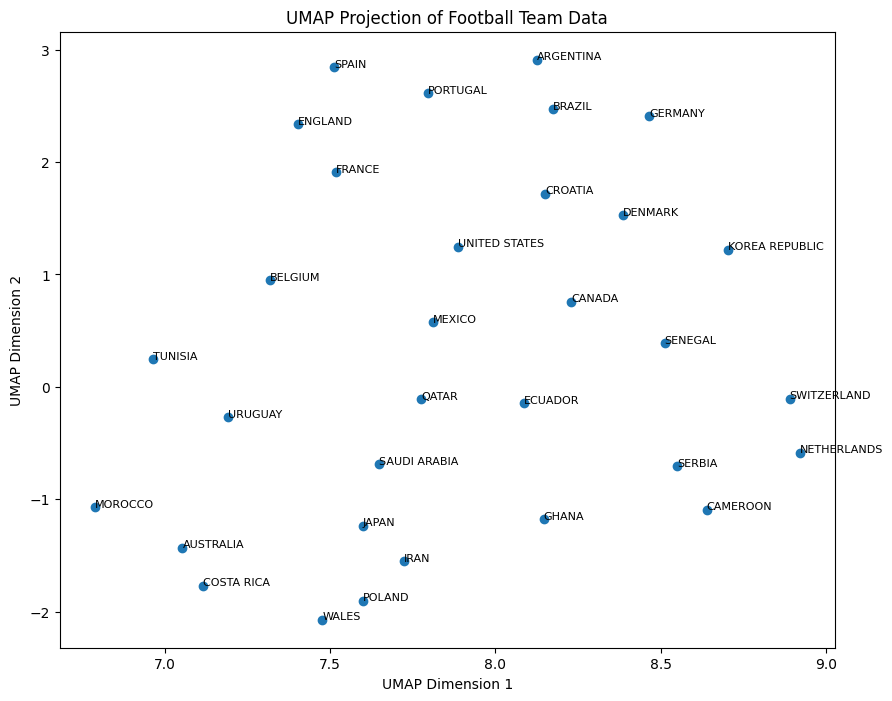

In [8]:
import umap

# Create a UMAP model and apply it to the data
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(data_scaled)

# Create a DataFrame for the embedding with country names
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=result_data.index)

# Visualize the UMAP projection
plt.figure(figsize=(10, 8))
plt.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'])

# Add country labels to the plot
for i, country in enumerate(embedding_df.index):
    plt.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Projection of Football Team Data')
plt.show()

# 군집화 알고리즘 (KMEANS)

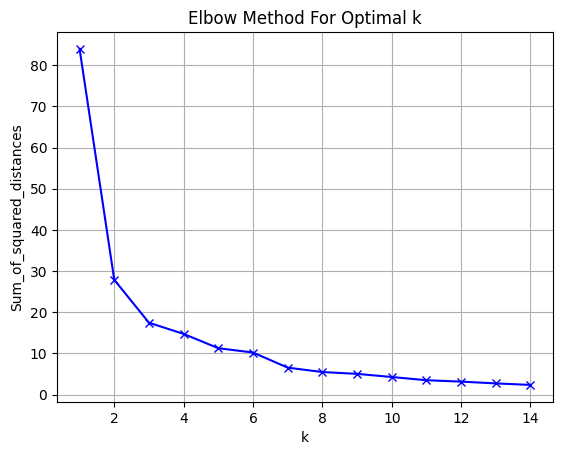

In [9]:
from sklearn.cluster import KMeans

# Calculate sum of squared distances for different k values

sum_of_squared_distances = []
K = range(1, 15)  # Range of k values to explore (1 to 14)
for k in K:
	# Create a KMeans model with k clusters and fixed random state
    km = KMeans(n_clusters = k, random_state=42)
    # Fit the model to the data
    km = km.fit(embedding_df)
    # Append the inertia (sum of squared distances) to the list
    sum_of_squared_distances.append(km.inertia_)

# Elbow Method visualization
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)

plt.show()

In [10]:
from sklearn.metrics import silhouette_score
k_range = range(2,14) # Range of k values to explore (2 to 13)

# Initialize variables to track best k and score
best_n = -1
best_silhouette_score = -1

for k in k_range:
    # Create a KMeans model with the current k and fixed random state
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the embedded data (assuming embedding_df is your data)
    kmeans.fit(embedding_df)
    # Predict cluster labels for the data
    clusters = kmeans.predict(embedding_df)

    # Calculate silhouette score for the current k
    score = silhouette_score(embedding_df, clusters)

    # Print results for each k
    print('k :',  k, 'score :', score)

    # Update best k and score if current score is better
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score

# Print results for the best k
print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.5197617
k : 3 score : 0.42164448
k : 4 score : 0.33923727
k : 5 score : 0.3030168
k : 6 score : 0.2784087
k : 7 score : 0.35746652
k : 8 score : 0.31818193
k : 9 score : 0.31922013
k : 10 score : 0.28796852
k : 11 score : 0.27462935
k : 12 score : 0.2612208
k : 13 score : 0.27495676
best n : 2 best score : 0.5197617


<ipython-input-11-c3c8553a7a9c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)
<ipython-input-11-c3c8553a7a9c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)
<ipython-input-11-c3c8553a7a9c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(embedding_df['UMAP1'

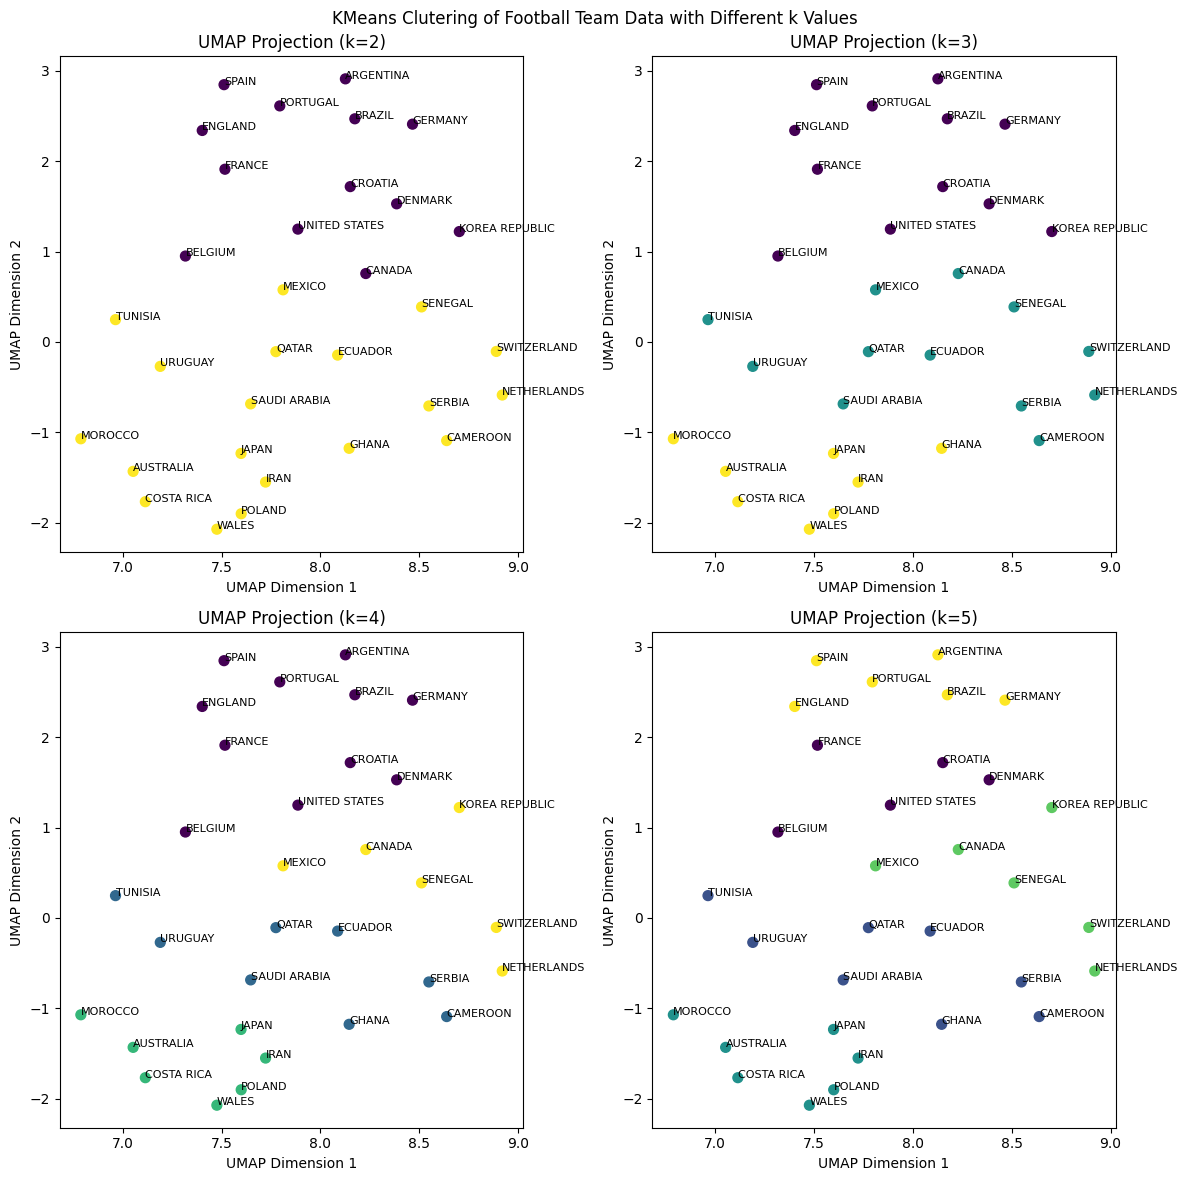

In [11]:
# List of k values to visualize
k_values = [2, 3, 4, 5]

# Create a subplot grid to display multiple plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, k in enumerate(k_values):
    # Create a KMeans model for the current k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_df)
    clusters = kmeans.predict(embedding_df)

    # Plot for the current k on the corresponding subplot
    ax = axes.flat[i]
    ax.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], c=clusters, s=50, cmap='viridis')

    # Add country labels to the plot
    for i, country in enumerate(embedding_df.index):
        ax.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)

    # Set labels and title for each subplot
    ax.set_xlabel('UMAP Dimension 1')
    ax.set_ylabel('UMAP Dimension 2')
    ax.set_title(f'UMAP Projection (k={k})')

# Adjust layout and display the plots
fig.suptitle('KMeans Clutering of Football Team Data with Different k Values')
plt.tight_layout()
plt.show()

# 군집화 알고리즘 (DBSCAN)

<ipython-input-12-561b7f66237f>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)


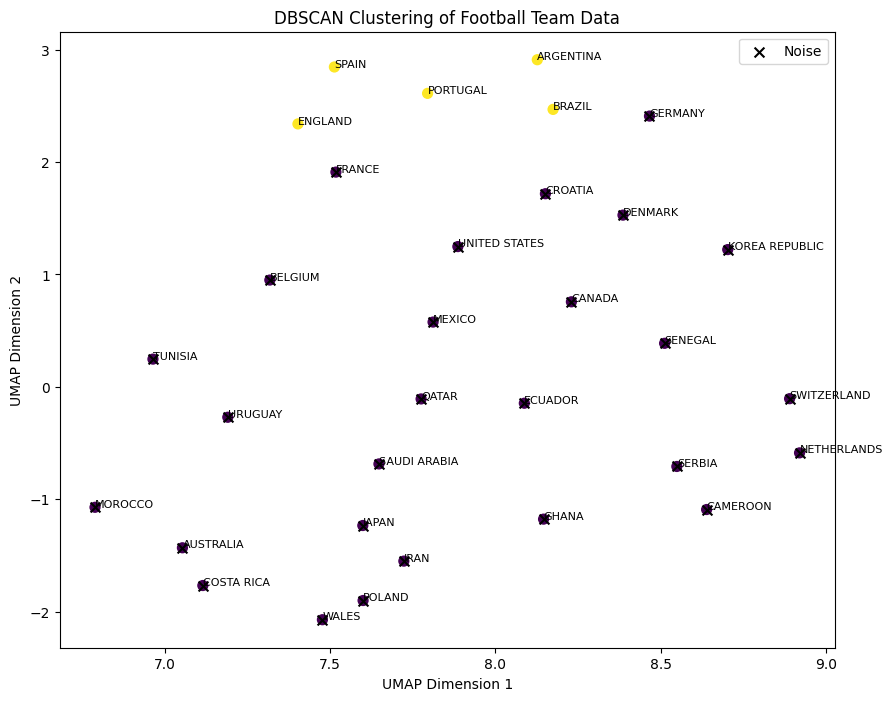

Silhouette Score: 0.35644519329071045, Calinski-Harabasz Index: 18.31446702453306


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Define a function to evaluate cluster quality using Silhouette Score and Calinski-Harabasz Index
def evaluate_cluster_quality(dataframe, labels):
    # Calculate Silhouette Score
    score_silhouette = silhouette_score(embedding_df, labels)
    # Calculate Calinski-Harabasz Index
    score_calinski_harabasz = calinski_harabasz_score(embedding_df, labels)
    # Print the scores
    print("Silhouette Score: {}, Calinski-Harabasz Index: {}".format(score_silhouette, score_calinski_harabasz))

# Create a DBSCAN model and fit the DBSCAN model to the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(embedding_df)

# Visualize the clusters using UMAP projection
plt.figure(figsize=(10, 8))
plt.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], c=labels, cmap='viridis', s=50)

# Highlight noise points in black
plt.scatter(embedding_df['UMAP1'][labels == -1], embedding_df['UMAP2'][labels == -1], c='black', marker='x', s=50, label='Noise')

# Add country labels to the plot
for i, country in enumerate(embedding_df.index):
    plt.text(embedding_df['UMAP1'][i], embedding_df['UMAP2'][i], country, fontsize=8)

# Set plot labels and title
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('DBSCAN Clustering of Football Team Data')
plt.legend()
plt.show()

# Evaluate the cluster quality
evaluate_cluster_quality(embedding_df, labels)

# 군집화 알고리즘 (hierarchy)

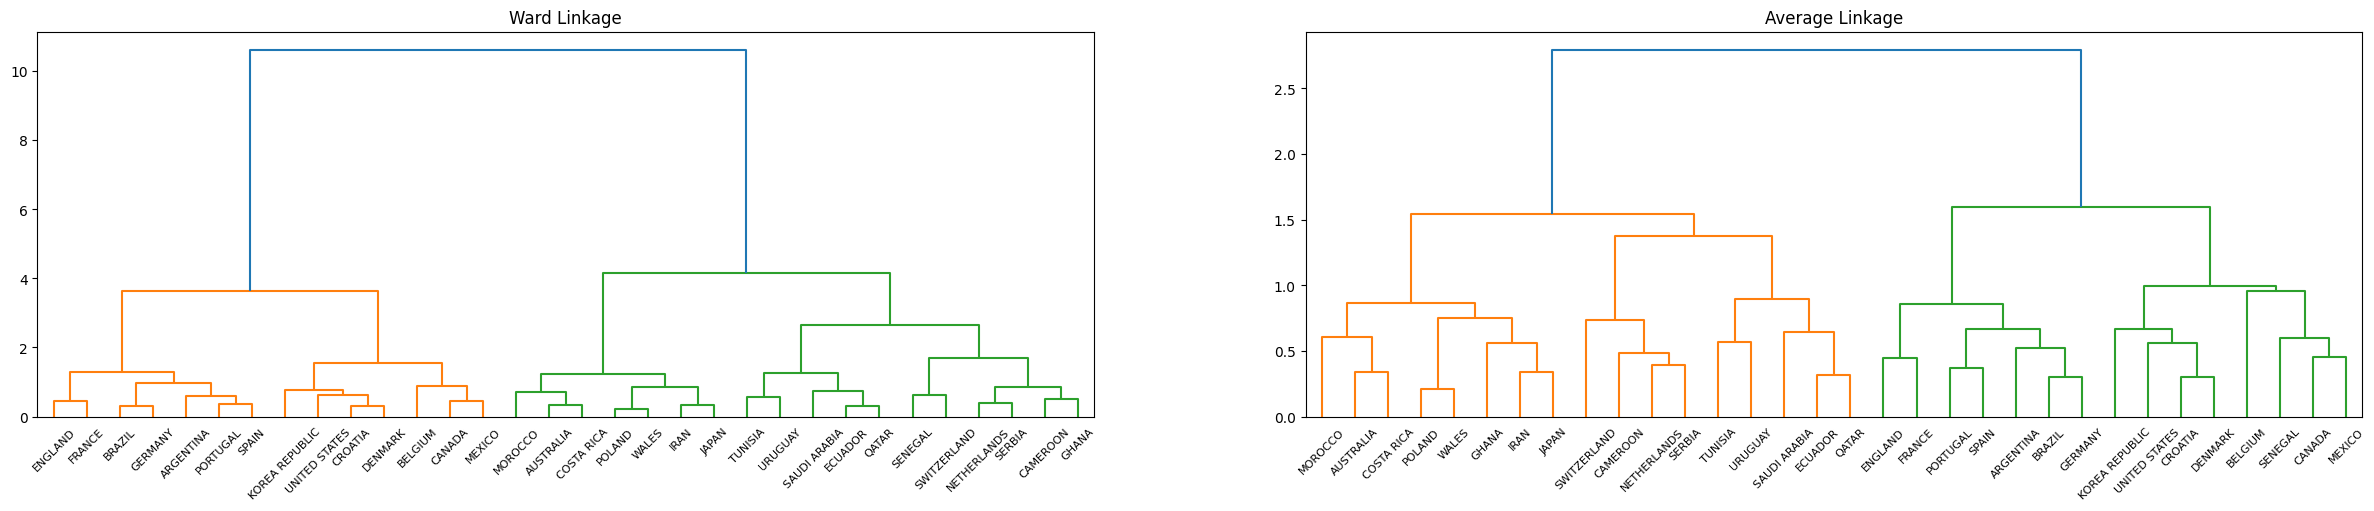

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


# Perform hierarchical clustering using Ward's method and average linkage method
linked_ward = linkage(embedding_df, 'ward')
linked_average = linkage(embedding_df, 'average')


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))

# First dendrogram (Ward's method)
dendrogram(linked_ward, orientation='top', ax=ax1, labels=embedding_df.index)
ax1.set_title('Ward Linkage')

# Second dendrogram (Average linkage)
dendrogram(linked_average, orientation='top', ax=ax2, labels=embedding_df.index)
ax2.set_title('Average Linkage')

plt.show()